In [1]:
import yfinance as yf
import matplotlib as plt
import numpy as np 
import pandas as pd

In [2]:
# df = yf.download("EURUSD=x","2000-10-10","2024-10-10",interval="1D")
# df.to_csv("eurusd.csv")
df = pd.read_csv("eurusd.csv",index_col = 0, parse_dates=[0])
df.drop( columns={ "Volume"}, inplace= True)

In [3]:
df.head()

,Open,High,Low,Close,Adj Close
Date,,,,,
2003-12-01,1.203398,1.204007,1.194401,1.196501,1.196501
2003-12-02,1.196101,1.210903,1.194600,1.208897,1.208897
2003-12-03,1.209000,1.213003,1.207700,1.212298,1.212298
2003-12-04,1.212004,1.214403,1.204398,1.208094,1.208094
2003-12-05,1.207802,1.219096,1.206593,1.218695,1.218695


In [4]:
# df.Close.plot( figsize=(16,8), title="EUR/USD",fontsize=10)

In [5]:
df = df.Close.to_frame().copy()
df.rename(columns={"Close":"price"},inplace=True)
# df
df["Return"] = df.price.div(df.price.shift(1))
df["log_return"] = np.log(df.price.div(df.price.shift(1)))

In [6]:
df.head()

,price,Return,log_return
Date,,,
2003-12-01,1.196501,NaN,NaN
2003-12-02,1.208897,1.010360,0.010307
2003-12-03,1.212298,1.002813,0.002809
2003-12-04,1.208094,0.996533,-0.003473
2003-12-05,1.218695,1.008775,0.008736


In [7]:
# df.plot(figsize=(16,8))

In [8]:
# df = df.dropna()
# df.to_csv("eurusdClose.csv")
df= pd.read_csv("eurusdClose.csv",index_col=0,parse_dates=[0])


<Axes: >

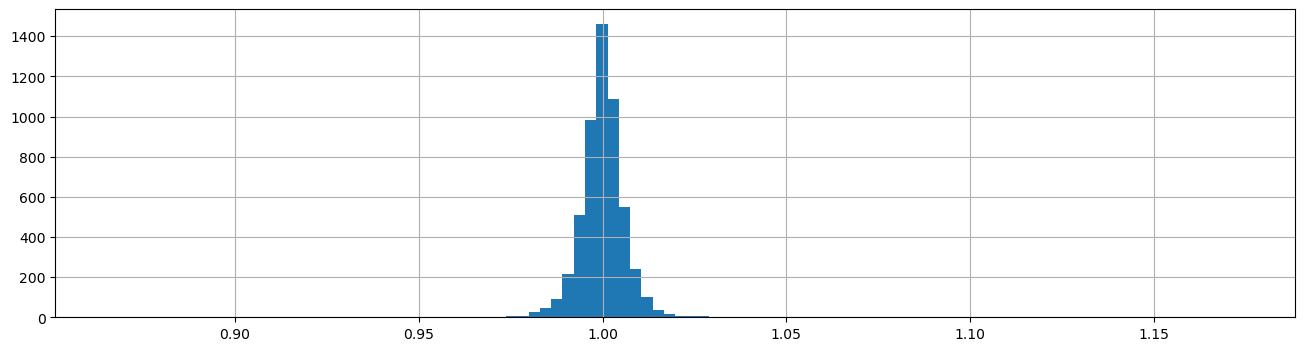

In [9]:
df.Return.hist(bins=100,figsize=(16,4))

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5414 entries, 2003-12-01 to 2024-10-09
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       5414 non-null   float64
 1   Return      5413 non-null   float64
 2   log_return  5413 non-null   float64
dtypes: float64(3)
memory usage: 169.2 KB


In [11]:
df.Return.sum()

5413.049006223125

In [12]:
# np.exp(df.Return.sum())

# df.price[-1]/ df.price[0]

In [13]:
df.Return.cumsum().apply(np.exp)
df

,price,Return,log_return
Date,,,
2003-12-01,1.196501,NaN,NaN
2003-12-02,1.208897,1.010360,0.010307
2003-12-03,1.212298,1.002813,0.002809
2003-12-04,1.208094,0.996533,-0.003473
2003-12-05,1.218695,1.008775,0.008736
...,...,...,...
2024-10-03,1.104850,0.998608,-0.001393
2024-10-04,1.103558,0.998830,-0.001170
2024-10-07,1.097454,0.994469,-0.005546


In [14]:
df["HH"] = df.price.cummax()
df["LL"] = df.price.cummin()
# df.drop(columns=["ll"],inplace=True)
# df.iloc[:,[0,-2,-1]].plot(figsize=(16,8))
# df

In [15]:
df =  df.price.to_frame().copy()
df["ma50"] = df.price.rolling(50).mean()
df["ma100"] = df.price.rolling(100).mean()

<Axes: title={'center': 'EUR/USD'}, xlabel='Date'>

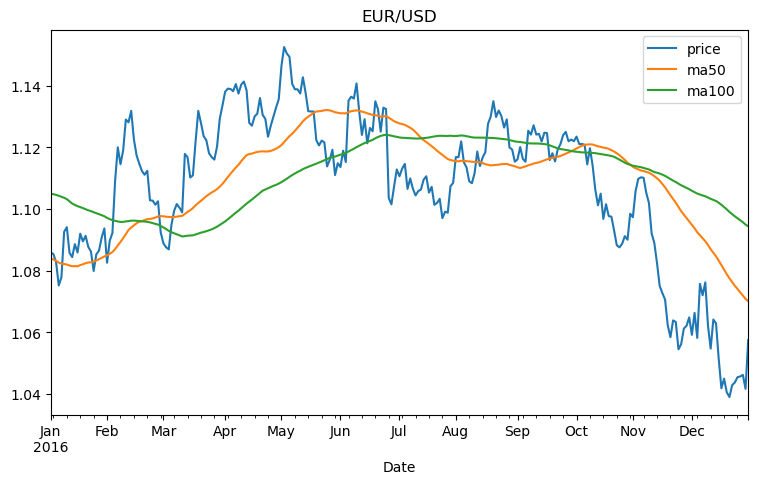

In [16]:
df.loc['2016'].plot(figsize=(9,5),title="EUR/USD")
# df

In [17]:
df["position"] = np.where(df.ma50 > df.ma100,1,-1 )
df

,price,ma50,ma100,position
Date,,,,
2003-12-01,1.196501,NaN,NaN,-1
2003-12-02,1.208897,NaN,NaN,-1
2003-12-03,1.212298,NaN,NaN,-1
2003-12-04,1.208094,NaN,NaN,-1
2003-12-05,1.218695,NaN,NaN,-1
...,...,...,...,...
2024-10-03,1.104850,1.104122,1.092778,1
2024-10-04,1.103558,1.104490,1.092946,1
2024-10-07,1.097454,1.104732,1.093045,1


<Axes: xlabel='Date'>

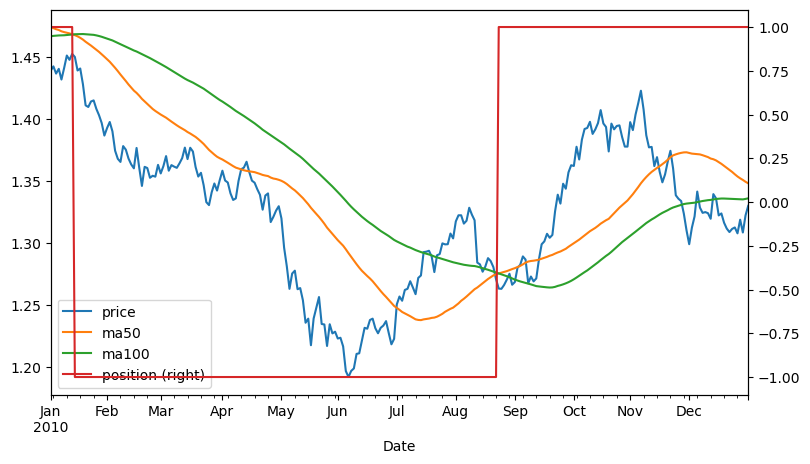

In [18]:
df.loc["2010"].plot(figsize=(9,5),secondary_y= "position")

In [19]:
df["l_return"] = np.log(df.price.div(df.price.shift(1)))
df

,price,ma50,ma100,position,l_return
Date,,,,,
2003-12-01,1.196501,NaN,NaN,-1,NaN
2003-12-02,1.208897,NaN,NaN,-1,0.010307
2003-12-03,1.212298,NaN,NaN,-1,0.002809
2003-12-04,1.208094,NaN,NaN,-1,-0.003473
2003-12-05,1.218695,NaN,NaN,-1,0.008736
...,...,...,...,...,...
2024-10-03,1.104850,1.104122,1.092778,1,-0.001393
2024-10-04,1.103558,1.104490,1.092946,1,-0.001170
2024-10-07,1.097454,1.104732,1.093045,1,-0.005546


In [20]:
df["strategy"] = df.position.shift(1) * df.l_return

In [21]:
df

,price,ma50,ma100,position,l_return,strategy
Date,,,,,,
2003-12-01,1.196501,NaN,NaN,-1,NaN,NaN
2003-12-02,1.208897,NaN,NaN,-1,0.010307,-0.010307
2003-12-03,1.212298,NaN,NaN,-1,0.002809,-0.002809
2003-12-04,1.208094,NaN,NaN,-1,-0.003473,0.003473
2003-12-05,1.218695,NaN,NaN,-1,0.008736,-0.008736
...,...,...,...,...,...,...
2024-10-03,1.104850,1.104122,1.092778,1,-0.001393,-0.001393
2024-10-04,1.103558,1.104490,1.092946,1,-0.001170,-0.001170
2024-10-07,1.097454,1.104732,1.093045,1,-0.005546,-0.005546


In [22]:
df.iloc[:,-2:].sum().apply(np.exp)

l_return    0.917320
strategy    2.142988
dtype: float64

In [23]:
# df.iloc[:,-2:].mean() * 252
# df.iloc[:,-2:].std() * np.sqrt(252)
df

,price,ma50,ma100,position,l_return,strategy
Date,,,,,,
2003-12-01,1.196501,NaN,NaN,-1,NaN,NaN
2003-12-02,1.208897,NaN,NaN,-1,0.010307,-0.010307
2003-12-03,1.212298,NaN,NaN,-1,0.002809,-0.002809
2003-12-04,1.208094,NaN,NaN,-1,-0.003473,0.003473
2003-12-05,1.218695,NaN,NaN,-1,0.008736,-0.008736
...,...,...,...,...,...,...
2024-10-03,1.104850,1.104122,1.092778,1,-0.001393,-0.001393
2024-10-04,1.103558,1.104490,1.092946,1,-0.001170,-0.001170
2024-10-07,1.097454,1.104732,1.093045,1,-0.005546,-0.005546


In [74]:
df= pd.read_csv("eurusdClose.csv",index_col=0,parse_dates=[0])
df.rename(columns={ "BTC":"price"},inplace=True)

In [75]:
def SMA(SMA):
    df["ma50"] = df.price.rolling(int(SMA[0])).mean()
    df["ma100"] = df.price.rolling(int(SMA[1])).mean()
    df["log_return"] = np.log(df.price.div(df.price.shift()))
    df.dropna(inplace=True)
    df["position"] = np.where(SMA[0] > SMA[1] , 1,-1)
    df["strategy"] = df.position.shift(1) * df.log_return
    df.dropna(inplace=True)
    return np.exp(df.strategy.sum())
    # print(df)
    # print(df.strategy.sum().apply(np.exp))

In [76]:
from itertools import product
import numpy as np
def optimize_parameter(n1_range,n2_range):
    n1 = range(*n1_range)
    n2 = range(*n2_range)
    comb = list(product(n1,n2))
    result = []
    for i in comb:
        result.append(SMA(i))
    print(f"MAX return: {np.max(result)} ")
    print(f"MAX return arg: {comb[np.argmax(result)]} ")

In [77]:
optimize_parameter((10,20,1),(50,100,1))

MAX return: 1.4466497181909503 
MAX return arg: (10, 69) 


In [26]:
SMA((50,200))

0.003784715115022113

In [27]:
sma_s = range(10,50,1) 
sma_l = range(100,252,1) 
 

In [28]:
from itertools import product

In [29]:
combination = list(product(sma_s,sma_l))
# combination

In [30]:
result=[]
for i in combination:
    result.append(SMA(i))

In [33]:
np.max(result)
np.argmax(result)
combination[26]

(10, 126)

In [38]:
df = pd.DataFrame(combination,columns=["sma_s","sma_l"])
df['result'] = result

In [41]:
df.nlargest(10,"result")

,sma_s,sma_l,result
28,10,128,1.093846
29,10,129,1.046429
30,10,130,1.000000
31,10,131,1.000000
32,10,132,1.000000
33,10,133,1.000000
34,10,134,1.000000
35,10,135,1.000000
36,10,136,1.000000
37,10,137,1.000000


In [42]:
df.nsmallest(10,"result")

,sma_s,sma_l,result
0,10,100,0.004653
1,10,101,0.005495
2,10,102,0.007015
3,10,103,0.009665
4,10,104,0.010067
5,10,105,0.016479
6,10,106,0.019707
7,10,107,0.044744
12,10,112,0.057179
10,10,110,0.103152
